# Proyecto 3 con Moving Average

1) Importación de librerías necesarias:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math

In [ ]:
#Filtro y guardo los datos en el archivo de entrenamiento hasta la fecha de febrero 2021
df4 = (df3[df3.index < "2021-03-01"])
df4.to_csv('reducido_train.csv', header=True, index=False) 
#Filtro y guardo los datos en el archivo de prueba del último mes (marzo 2021):
df5 = (df3[df3.index > "2021-02-28"]) 
df5.to_csv('reducido_test.csv', header=True, index=False)

In [2]:
df3 = pd.read_csv("reducido.csv", delimiter = ",", parse_dates=['time'], index_col='time')
df3.head(3)

,Close
time,
2011-12-31 08:52:00,4.39
2012-01-22 08:52:00,6.28
2012-02-02 16:52:00,6.25


In [3]:
# Timestamp Unix de ejemplo
timestamp = 0
# Convertir a fecha y hora legible
fecha_hora = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
print(fecha_hora)  # imprime "1970-01-01"

1970-01-01


In [4]:
# Timestamp Unix de "2021-02-28"
timestamp = 1614460800
# Convertir a fecha y hora legible
fecha_hora = datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
print(fecha_hora)  # imprime "2021-02-28"

2021-02-27


### Graficamos

<function matplotlib.pyplot.show(close=None, block=None)>

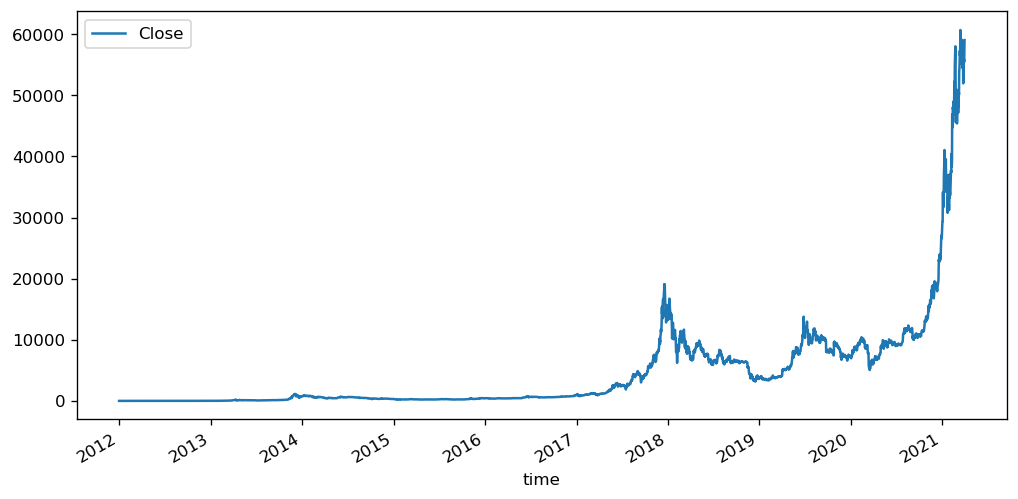

In [3]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
df3.plot(kind='line', y='Close')
plt.show

7) Seleccionar modelo

In [4]:
from statsmodels.tsa.arima_model import ARIMA
# Crear el modelo ARIMA
model = ARIMA(df3['Close'], order=(2, 1, 2)) #hiperparámetros
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [5]:
# Realizar la predicción
predictions = model_fit.forecast(steps=30)[0]

# Imprimir las predicciones
print(predictions)

[58569.13728001 58878.0005521  59339.72014774 58993.4605098
 58624.07258348 59060.94475197 59392.35857154 58939.70295001
 58716.69757125 59235.93642117 59408.82614529 58899.60651892
 58843.07538957 59391.98171435 59394.78464296 58883.1896574
 58995.98625512 59520.27925283 59358.80756805 58897.82918221
 59165.73892059 59615.04530441 59311.44266889 58947.58995968
 59341.20866857 59674.01428119 59264.10116019 59032.90469472
 59510.99166924 59698.57292757]


### Calcular el Moving Average

In [32]:
#Con una ventana de 365 días
df3['MA_365'] = df3['Close'].rolling(window=365).mean()
df3["logPrice"] = df3["Close"].apply(lambda x: math.log10(x))
df3.head(3)

,Close,MA_365,logPrice
time,,,
2011-12-31 08:52:00,4.39,NaN,0.642465
2012-01-22 08:52:00,6.28,NaN,0.797960
2012-02-02 16:52:00,6.25,NaN,0.795880


### Gráficas

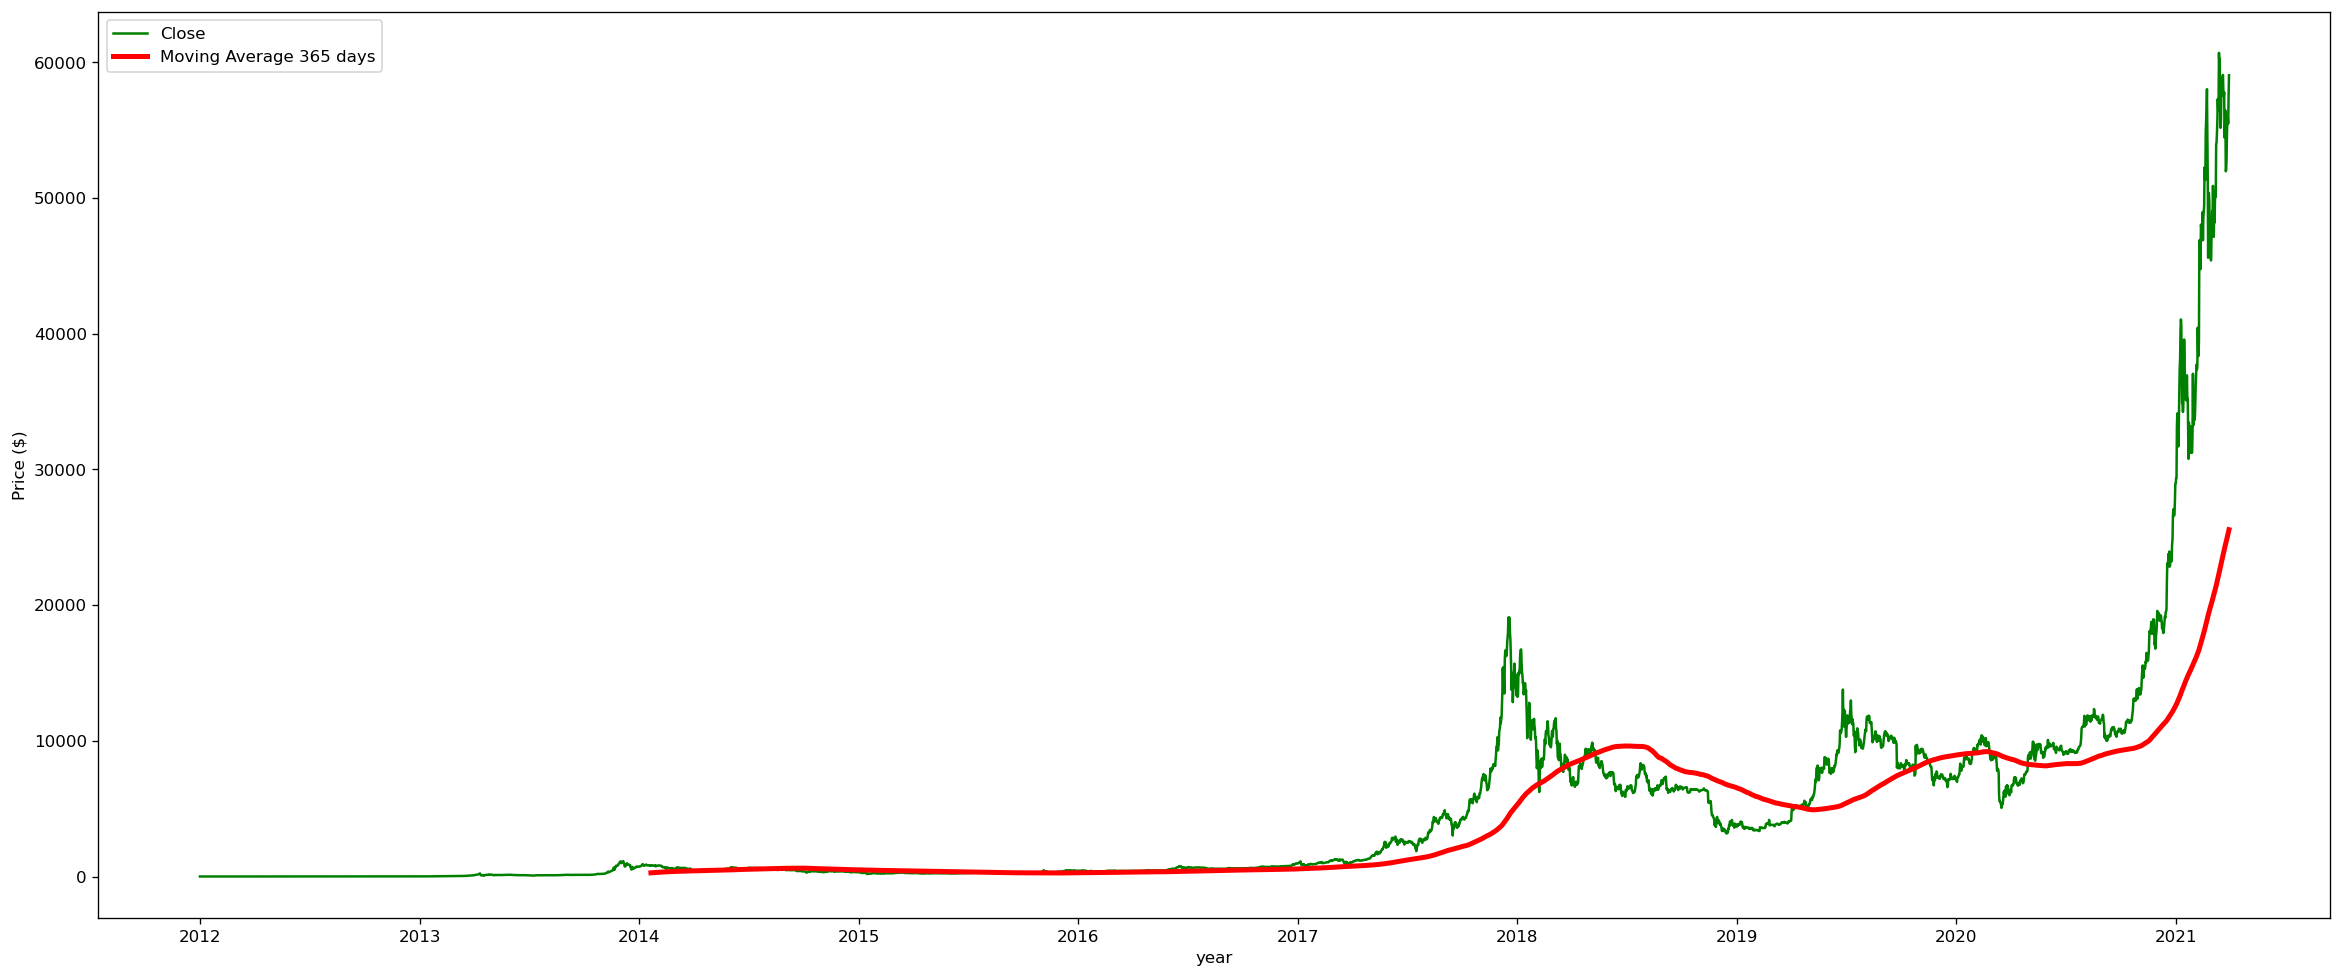

In [7]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
# Draw it
plt.figure(figsize=(24,10))
plt.plot(df3['Close'], label = 'Close', color = 'green')
plt.plot(df3['MA_365'], label = 'Moving Average 365 days', color = 'red', linewidth=3)
plt.xlabel('year')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

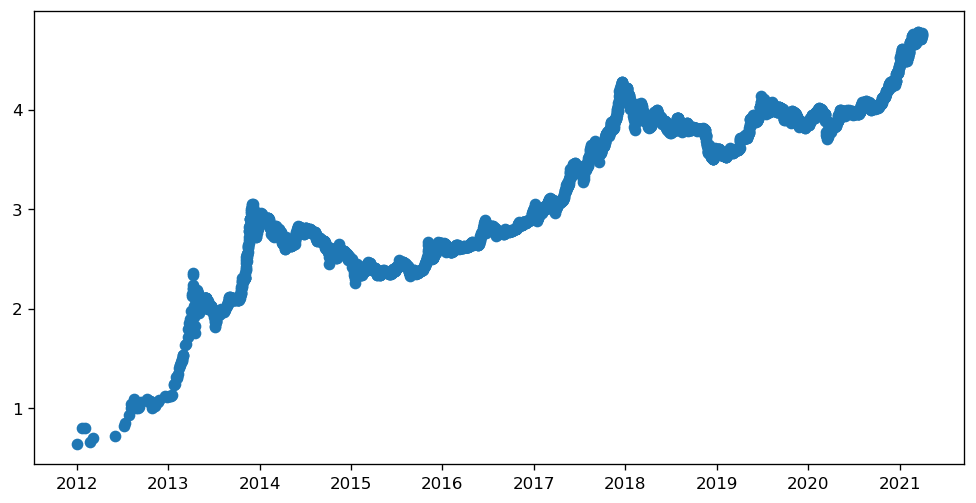

In [31]:
fig, ax = plt.subplots()
#ax.scatter(df3.index, df3.MA_365)
ax.scatter(df3.index, df3.logPrice)
#ax.plot(df3)
plt.show()

In [11]:
# dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
train = df3[:int(0.8*(len(df3)))]
test = df3[int(0.8*(len(df3))):]

In [12]:
# entrenar el modelo ARIMA
model = ARIMA(train['Close'], order=(1, 0, 1))
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

10) Entrenamiento del modelo

In [24]:
# hacer predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))[1]

In [34]:
print(predictions)

[ 219.20544455  314.22066323  386.33947763  446.791039    499.82722072
  547.60729378  591.40698841  632.05473081  670.1247018   706.03436275
  740.09856997  772.56179317  803.618383    833.42589744  862.11418928
  889.79179502  916.55054462  942.4689628   967.61482799  992.04713082
 1015.81759578 1038.97187984 1061.55052785 1083.5897427  1105.1220122
 1126.17662405 1146.78009247 1166.95651419 1186.7278677  1206.11426649
 1225.13417448 1243.80459053 1262.1412071  1280.15854751 1297.8700851
 1315.28834728 1332.42500652 1349.29096052 1365.89640282 1382.25088542
 1398.36337432 1414.24229908 1429.89559706 1445.33075309 1460.55483513
 1475.57452631 1490.39615394 1505.02571574 1519.4689036  1533.73112524
 1547.81752384 1561.732996   1575.48220822 1589.06961186 1602.49945698
 1615.77580496 1628.90254021 1641.88338087 1654.72188878 1667.42147858
 1679.98542624 1692.41687693 1704.71885227 1716.89425717 1728.94588607
 1740.87642886 1752.68847637 1764.38452542 1775.96698364 1787.43817394
 1798.80

In [25]:
# calcular el error de las predicciones
error = np.mean(np.abs(predictions - test['Close'].values)) / np.mean(test['Close'].values)
print('Error:', error)

Error: 0.8181422048742558


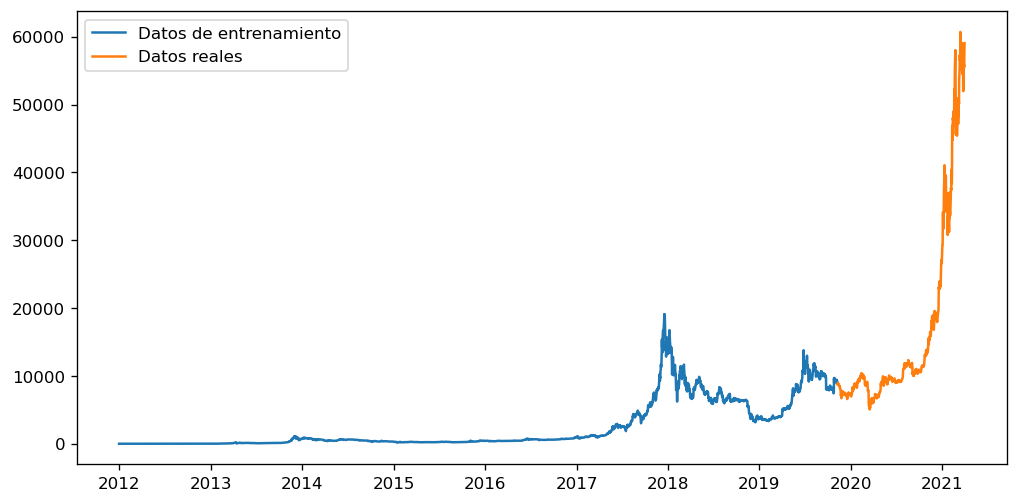

In [35]:
# visualizar los resultados
plt.plot(train['Close'], label='Datos de entrenamiento')
plt.plot(test['Close'], label='Datos reales')
plt.legend()
plt.show()

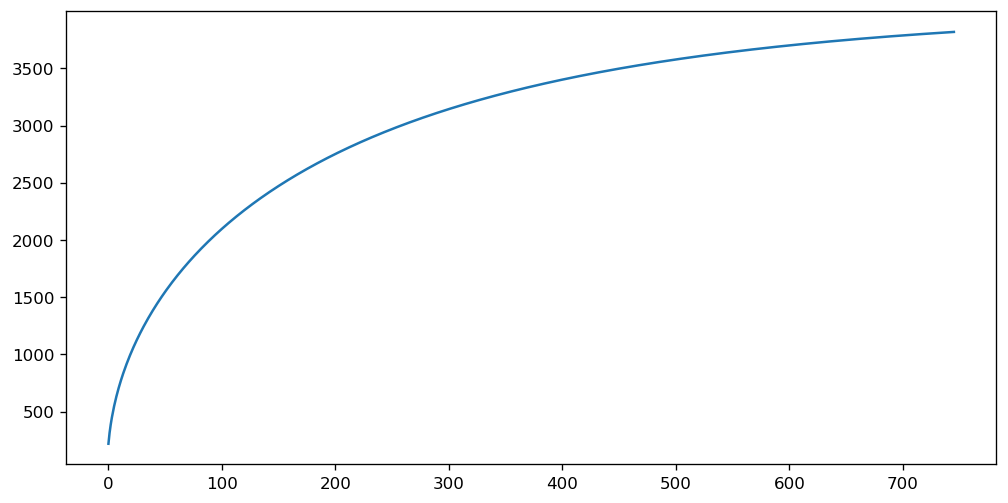

In [38]:
plt.plot(predictions, label='Predicción')